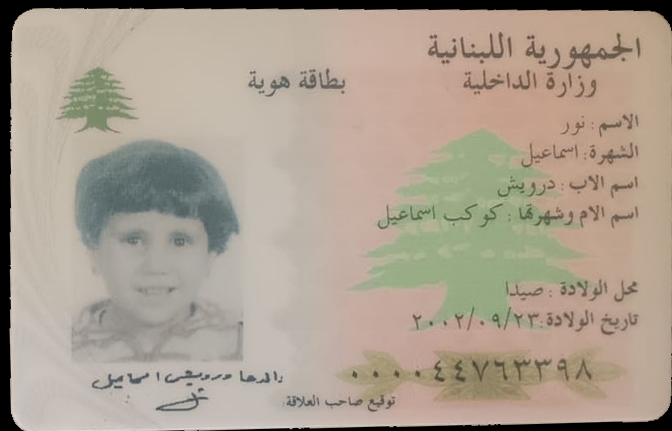

True

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread('/content/drive/MyDrive/RawImages/id7.jpeg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Perform edge detection using Canny edge detection
edges = cv2.Canny(blur, 50, 150)

# Find contours of the edges
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get the largest contour
largest_contour = max(contours, key=cv2.contourArea)

# Create a mask of the same size as the input image
mask = np.zeros_like(gray)

# Fill the mask with white pixels where the largest contour is
cv2.drawContours(mask, [largest_contour], 0, (255, 255, 255), -1)

# Apply the mask to the input image to extract the ID card
result = cv2.bitwise_and(img, img, mask=mask)

# Find the minimum area rectangle that encloses the contour of the ID card
rect = cv2.minAreaRect(largest_contour)

# Get the angle of rotation needed to make the rectangle vertical
angle = rect[2]

# If the angle is less than -45 degrees, add 90 degrees to make it positive
if angle < -45:
    angle += 90

# Rotate the image by the angle of rotation
(h, w) = result.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
result = cv2.warpAffine(result, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

# Get the bounding box of the largest contour
x, y, w, h = cv2.boundingRect(largest_contour)

# Crop the image to only contain the ID card
result = result[y:y+h, x:x+w]

# Display the extracted and cropped ID card
cv2_imshow(result)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite('/content/drive/MyDrive/ProcessedImages/id7.jpg', result)


In [ ]:
!pip install pytesseract
!sudo apt install tesseract-ocr
!pip install arabic-reshaper
!pip install python-bidi


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
